# **IEOR 4404  Simulation (Fall 2019)**

**Homework 3[Total points: 60]**

** Due: 11:59 PM, Oct 14

This third homework focuses on the inverse transform method for discrete distributions.

The steps to finish in the homework:

*   Step 1: Make a copy of the file to your LionDrive.
*   Step 2: Work with the copy (an ipynb file).
*    <font color='red'>**Step 3: Rename the copy to your_uni_hw3.ipynb (For example: yd4501_hw3.ipynb).**</font>  
*   Step 4: Submit the copy on CourseWorks.

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)




In [1]:
#This imports all the packages you need for the homework
#Please run this first
#we will need this for array operation
import numpy as np

#We will need this for factorial computation
import scipy.special as spsp

#We will need this for visualization
import matplotlib.pyplot as plt

#We can use this for math functions
import math
 
import seaborn as sns


In [2]:
#Your Name: Vaishnavi Avachat
#Your UNI: vma2120

#Exercise 1  [Total: 54 Points]


## Setting 

A mathematician carries two matchboxes in the pockets of his jacket. One matchbox is in the left pocket. The other matchbox is in the right pocket. The left pocket contains $n_l$ matches, while the right pocket contains $n_r$ matches. Every time he wants to light a cigar, the mathematician randomly picks a match from one of his pockets. The probability he picks the match from his left pocket is $p$. The probability he picks the match from his right pocket is $1−p$. After a certain number of cigars, he puts a hand in one of his pockets, finding that he has no more matches in that pocket.


[Pay attention: The mathematician does not know he will run out of the matches when he got the last match in one pocket. He only knows that he runs out of matches in one pocket when he reaches out to his pocket and finds the matchbox in the pocket is empty]


## Q1. [7 points]

Fill in function matchbox_problem that simulates the scenario.

This function should have two return values

1. Left. A Boolean value (True/False), indicating whether the left pocket was the pocket when the mathematican found that a match box was empty. 
2. N_matches. A integer value indicating how many matches were in the other packet when the mathematician found one of the pocket is empty. 

Run this function 100000 times with $n_r = 35,n_l=40,  p = 0.55$, 

* Compute how many times the mathematician found that he ran out of matches in his left pocket first
* Visualize the distribution of the number of matches left in the other pocket when the mathematician found one of the pocket had an empty matchbox. 
* Report the mean of the sample distribution

In [3]:
def matchbox_problem(nl,nr,p):
  #Fill in the function
  
  while True:
    u = np.random.rand()
    #print ("Random no: ", u)
    
    if u<=p:
      if (nl==0):
        break
      nl = nl - 1
    else:
      if (nr==0):
        break
      nr = nr - 1
  
#   print (nl)
#   print(nr)
  
  if nl==0:
    Left = True
    N_matches = nr
  else:
    Left = False
    N_matches = nl
  
  return Left, N_matches
 

The number of times mathematician ran out of matches in left pocket first:  65966.0
[1. 1. 1. ... 1. 0. 0.]
[12.  0.  5. ... 12.  2.  7.]


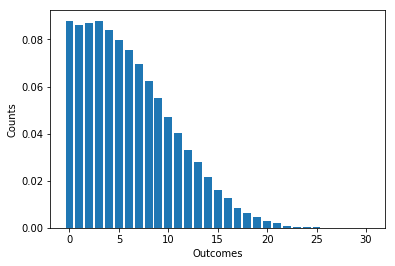

In [4]:
Left_arr = np.empty(100000)
# print(Left_arr)
Match_arr = np.empty(100000)

for i in range(100000):
  #a,b = matchbox_problem(40,35,0.55)
  #print (a)
  Left_arr[i], Match_arr[i] = matchbox_problem(40,35,0.55)
  
print ("The number of times mathematician ran out of matches in left pocket first: ", np.sum(Left_arr))
  
print(Left_arr)
print(Match_arr)
# sns.distplot(Match_arr, axlabel="Distribution of matchboxes")

outcomes, counts = np.unique(Match_arr, return_counts=True)
plt.bar(outcomes,counts/np.sum(counts))
plt.xlabel("Outcomes")
plt.ylabel("Counts")
plt.show()

In [5]:
print("Mean of sample dist: ", np.dot(outcomes,(counts/np.sum(counts))))

Mean of sample dist:  6.09894


## Q2 [7 point]

It can be shown that if $p = 1/2$ and $n_l=n_r=n$,

$$
P(\textrm{There are }k\textrm{ matches in the other matchbox}) = \frac{(2n - k)!}{(n-k)!n!}\left(\frac{1}{2}\right)^{2n-k}
$$

where $k=0,1,2,3,...n$

Let's assume that $n=75$. 
* Print out the mean of k.  
* Create an array indicating the CDF corresponding to $k=0, 1, 2, 3,..., n$. Print out the values of the CDF.
* Visualize the pmf of this distribution

Mean of k:  8.820815687337557
CDF array is:  [0.06503851 0.13007703 0.19467904 0.25840806 0.32083648 0.38155453
 0.44017886 0.49636051 0.54979201 0.60021328 0.64741617 0.69124743
 0.73161003 0.76846283 0.80181866 0.8317408  0.85833825 0.88175989
 0.90218779 0.91983006 0.93491353 0.94767647 0.95836172 0.96721044
 0.97445664 0.98032261 0.98501538 0.98872419 0.99161887 0.99384919
 0.99554498 0.99681682 0.99775733 0.9984428  0.99893493 0.99928281
 0.99952481 0.9996904  0.99980176 0.99987534 0.99992307 0.99995344
 0.99997239 0.99998397 0.9999909  0.99999495 0.99999726 0.99999855
 0.99999926 0.99999963 0.99999982 0.99999991 0.99999996 0.99999998
 0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


Text(0.5,1,'PMF visualization')

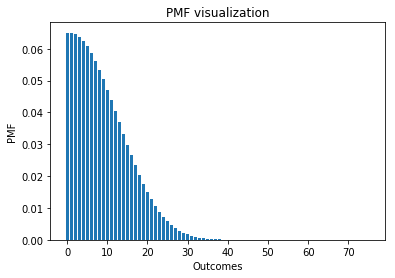

In [6]:
# Mean = (spsp.comb(2n-k,n))*(1/2)**(2n-k)
n = 75

Outcomes = np.arange(n+1)
#print(Outcomes)
PMF_arr = spsp.comb(2*n-Outcomes,n)*(1/2)**(2*n-Outcomes)
#print(PMF_arr)

mean = np.sum(Outcomes*PMF_arr)

print("Mean of k: ", mean)

CDF_arr = np.cumsum(PMF_arr)
print("CDF array is: ", CDF_arr)

plt.bar(Outcomes, PMF_arr)
plt.xlabel("Outcomes")
plt.ylabel("PMF")
plt.title("PMF visualization")

## Q3 [7 points]
Fill in function

Def matchbox_sample():

Inside the function, we will draw a sample from the distribution described in Q2. The search starts from x=0. The CDF will be updated based on PMF. The PMF will be updated using the iterative method.  

This function will have one return value, which is the sample value of $k$.

* Use this function to draw 100000 samples from the distribution
* Print out the sample mean
* Visualize the distribution of the 100000 samples using bar chart.


In [7]:
n = 75 
def matchbox_sample():
  u=np.random.rand()
  #print(u)
  k=0
  #CDF for k=0
  PMF=spsp.comb(2*n-k,n)*(1/2)**(2*n-k)
  CDF=PMF

  while (u>=CDF):
    k=k+1
    PMF=(PMF*(2*(n-(k-1))))/(2*n-(k-1))
    CDF=CDF+PMF
    #print(u,CDF)
    
  return k 
  

In [9]:
samples=np.array([matchbox_sample() for i in range(100000)])
samples

array([13, 19,  9, ..., 26,  4, 11])

In [10]:
sample_mean = np.mean(samples)
print("Sample mean is: ", sample_mean)

Sample mean is:  8.80244


Text(0,0.5,'Counts')

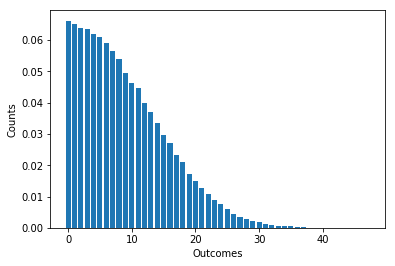

In [11]:
outcomes, counts = np.unique(samples, return_counts=True)
plt.bar(outcomes,counts/np.sum(counts))
plt.xlabel("Outcomes")
plt.ylabel("Counts")

## Q4 [7 points]

We have learned in class that it might be more efficient to start the search from a different starting point. In this exercise, let's start our search from x_a.

Define two functions

(1) Function 1

def CDF_start(x_a):

This function will return two values:

cdf_start: The CDF at the x_a for the distribution in Q2

pmf_start: The PMF at the x_a for the distribution in Q2


(2) Function 2

Def matchbox_sample_xa(x_a, n, cdf_start,pmf_start):

This function will generate a sample using the upward/downward search algorithm at x_a value. The CDF_start, PMF_start are the return values from Function 1. 

For both Function1 and Function 2, the PMF should be updated using the iterative method.  



* Based on function 1 and function 2, generate 100000 samples with x_a = int(expected value of x).    
* Print out the sample mean
* Visualize the distribution of the 100000 samples using bar chart.


In [13]:
n = 75
def CDF_start(x_a):
 
  #initialize all values
  x_start = np.floor(x_a)
  pmf_start = spsp.comb(2*n,n)*((1/2)**(2*n))
  cdf_start = pmf_start
  
  for i in np.arange(1, x_start +1):
    pmf_start = pmf_start * 2*(n-(i-1))/(2*n-(i-1))
    cdf_start = pmf_start + cdf_start
 
  return pmf_start,cdf_start

def matchbox_sample_xa(x_a, pmf_start, cdf_start):
  x_start = np.floor(x_a)
  u = np.random.rand()  

  #Start upward search:
  if u >= cdf_start:
    x_start = x_start +1
    pmf_start = pmf_start * 2*(n-(x_start-1))/(2*n-(x_start-1))
    cdf_start = pmf_start + cdf_start
    while(u>= cdf_start):
      x_start = x_start +1
      pmf_start = pmf_start * 2*(n-(x_start-1))/(2*n-(x_start-1))
      cdf_start = pmf_start + cdf_start
  else:
    cdf_start= cdf_start - pmf_start
    while(u<cdf_start):
      pmf_start = pmf_start/(2*(n-(x_start-1))/(2*n-(x_start-1)))
      cdf_start = cdf_start - pmf_start
      x_start = x_start - 1
  #print("x_start:", x_start)
  return x_start



[ 2.  8. 12. ...  6.  5.  1.]
The sample mean is:  8.80602


Text(0,0.5,'Counts')

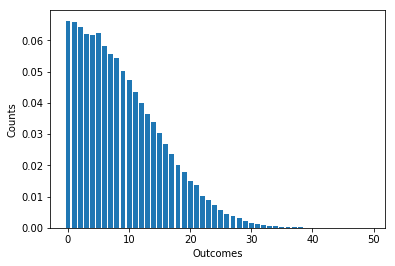

In [14]:
x_a = sample_mean
CDF_start(x_a)

a,b = CDF_start(x_a)

samples_new=np.array([matchbox_sample_xa(sample_mean, a, b) for i in range(100000)])
print (samples_new)

print ("The sample mean is: ", np.mean(samples_new))


outcomes, counts = np.unique(samples_new, return_counts=True)
plt.bar(outcomes,counts/np.sum(counts))
plt.xlabel("Outcomes")
plt.ylabel("Counts")

##Q5 [5 points]

In Q2, we have already computed the CDF array. Thus, instead of computing the PMF/CDF everytime when we generate a sample. We can instead use that CDF array to directly get the CDF corresponding to different x values. 

Fill in Function:

def matchbox_sample_xa_alt(x_a):


Inside the function, you will do the same thing as Q4 except the CDF(x) will be retrieved from the array you constructed in Q2.

Based on this function, 
* Generate 100000 samples with x_a equals  int(expected value of x).    
* Print out the sample mean
* Visualize the distribution of the 100000 samples using bar chart.


In [15]:
 n = 75

Outcomes = np.arange(n+1)
PMF_arr = spsp.comb(2*n-Outcomes,n)*(1/2)**(2*n-Outcomes)

CDF_arr = np.cumsum(PMF_arr)

def matchbox_sample_xa_alt(x_a):
  x_start = int(x_a)
  cdf_start = CDF_arr[x_start]
  u = np.random.rand()  

  #Start upward search:
  if u >= cdf_start:
    while(u>= cdf_start):
      x_start = x_start+1
      cdf_start = CDF_arr[x_start]
  else:
    cdf_start= CDF_arr[x_start-1]
    while(u<cdf_start):
      x_start = x_start - 1
      if (x_start == 0):
        return 0
      else:
        cdf_start = CDF_arr[x_start-1]

  #print("x_start:", x_start)
  return x_start

In [16]:
samples_new_alt=np.array([matchbox_sample_xa_alt(sample_mean) for i in range(20)])
samples_new_alt

array([17, 13,  3, 15, 13, 11, 13,  9, 16, 23, 11, 13,  7, 15, 16, 15,  6,
       15, 11, 15])

The sample mean is:  8.80422


Text(0,0.5,'Counts')

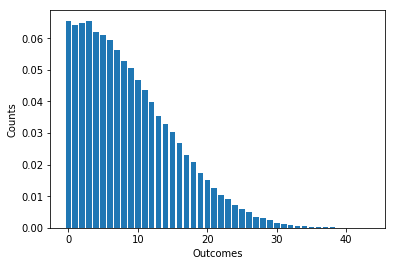

In [17]:
samples_new_alt=np.array([matchbox_sample_xa_alt(sample_mean) for i in range(100000)])
print ("The sample mean is: ", np.mean(samples_new_alt))

outcomes, counts = np.unique(samples_new_alt, return_counts=True)
plt.bar(outcomes,counts/np.sum(counts))
plt.xlabel("Outcomes")
plt.ylabel("Counts")

In [18]:
np.median(samples_new)

8.0

In [19]:
from scipy import stats

In [20]:
stats.mode(samples_new)

ModeResult(mode=array([0.]), count=array([6627]))

##Q6. [7 points]


Based on %%timeit, do the following comparison


* The performance in Q3 v.s. Q4

* The performance in Q4 v.s. Q5

* In addition, we are interested in whether np.floor(expected value of x) is the optimal starting value for Q5. 

>> Try different x_a and see whether you can find any x_a faster than int(expected value of x)

> >If you find no other value is better than int(expected value of x), explain why int(expected value of x) is the best starting value. If you find another value that is better than int(expected value of x), explain why the result is not consistant with Poisson distribution. 


In [21]:
%%timeit
n=75
samples=np.array([matchbox_sample() for i in range(100000)])
sample_mean = np.mean(samples)

1.31 s ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
a,b = CDF_start(x_a)
samples_new=np.array([matchbox_sample_xa(sample_mean, a, b) for i in range(100000)])

1.07 s ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


*The performance of Q4 is better than Q3*

In [23]:
%%timeit
samples_new_alt=np.array([matchbox_sample_xa_alt(sample_mean) for i in range(100000)])
np.mean(samples_new_alt)

223 ms ± 9.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The performance of Q5 is better than Q4

I cannot find a better value than the expected value. The reason is expected value is the value we would expect most out of our distribution. Therefore, the random variable will most likely be around expected value. Moreover, because of the unimodal curve, expected value makes sense.

In [36]:
%%timeit
samples_new_alt=np.array([matchbox_sample_xa_alt(sample_mean) for i in range(100000)])
np.mean(samples_new_alt)

205 ms ± 8.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##Q7. [7 points]

It can be shown that when for any values of $n_l$, $n_r$ and $p$. The PMF of $k$ follows:

$$
P(\textrm{There are }k\textrm{ matches in the other matchbox}) = \frac{(n_l+n_r- k)!}{(n_r-k)!(n_l)!}\left(p\right)^{n_l+1}\left(1-p\right)^{n_r-k}+\frac{(n_l+n_r- k)!}{(n_l-k)!(n_r)!}\left(p\right)^{n_l-k}\left(1-p\right)^{n_r+1}
$$

where $k=0,1,2,3,...max(n_l,n_r)$


* Visualize the PMF the distribution of $k$ with the parameter values used in Q1.
* Compute the CDF array and print it out.



Text(0,0.5,'PMF')

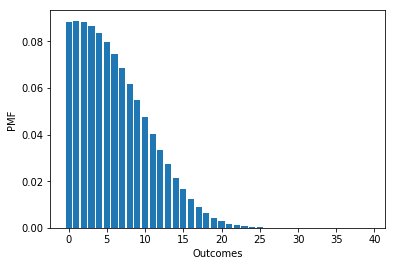

In [25]:
nl,nr,p=40,35,0.55
Outcomes=np.arange(max(nl,nr))
PMF=spsp.comb(nl+nr-Outcomes,nl)*((p)**(nl+1))*((1-p)**(nr-Outcomes))+spsp.comb(nl+nr-Outcomes,nr)*((p)**(nl-Outcomes))*((1-p)**(nr+1))
plt.bar(Outcomes,PMF)
plt.xlabel("Outcomes")
plt.ylabel("PMF")

In [26]:
print("The mean of distribution is: ", np.mean)

The mean of distribution is:  <function mean at 0x0000019D7AAB4A60>


In [27]:
CDF = np.cumsum(PMF)
print("The CDF array is:", CDF)

The CDF array is: [0.08824286 0.17707995 0.26536669 0.35191224 0.43552762 0.51507849
 0.58953904 0.65804269 0.71992512 0.77475559 0.82235311 0.86278563
 0.896352   0.92354843 0.94502283 0.96152179 0.97383576 0.98274781
 0.98899057 0.99321463 0.99596964 0.99769786 0.99873822 0.99933782
 0.99966795 0.9998412  0.99992771 0.99996873 0.99998717 0.99999503
 0.99999819 0.99999938 0.99999981 0.99999994 0.99999999 1.
 1.         1.         1.         1.        ]


## Q8. [7 points]

Let's try to implement the method used in Q5 by filling the following function

def matchbox_sample_general(x_a):

This function will generate a sample from the distribution in Q7 using the method discussed in Q5. 

After that 

* Argue what the best x_a value is for this function. 
* Based on the best x_a value, draw 100000 samples from this distribution. 
* Print out the sample mean
* Visualize the distribution of the 100000 samples using bar chart.
* Based on %%timeit compare the efficiency between Q1 method and Q8 method.

In [28]:
def matchbox_sample_general(x_a):
  x_start = int(x_a)
  cdf_start = CDF[x_start]
  u = np.random.rand()  

  #Start upward search:
  if u >= cdf_start:
    while(u>= cdf_start):
      x_start = x_start+1
      cdf_start = CDF[x_start]
  else:
    cdf_start= CDF[x_start-1]
    while(u<cdf_start):
      x_start = x_start - 1
      if (x_start == 0):
        return 0
      else:
        cdf_start = CDF[x_start-1]

  #print("x_start:", x_start)
  return x_start

Expected value should be start point. The reason is expected value is the value we would expect most out of our distribution. Therefore, the random variable generated will most likely be around expected value. Moreover, because of the unimodal curve, expected value makes sense.

In [29]:
nl,nr,p=40,35,0.55
Outcomes=np.arange(max(nl,nr))
PMF=spsp.comb(nl+nr-Outcomes,nl)*((p)**(nl+1))*((1-p)**(nr-Outcomes))+spsp.comb(nl+nr-Outcomes,nr)*((p)**(nl-Outcomes))*((1-p)**(nr+1))
mean=np.sum(Outcomes*PMF)
print (mean)

6.083028520327899


In [30]:
samples_gen=np.array([matchbox_sample_general(mean) for i in range(100000)])
print ("The sample mean is", np.mean(samples_gen))

The sample mean is 6.0463


Text(0,0.5,'Probability')

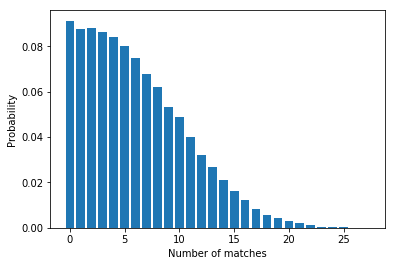

In [31]:
outcomes, counts = np.unique(samples_gen, return_counts=True)
plt.bar(outcomes,counts/np.sum(counts))
plt.xlabel("Number of matches")
plt.ylabel("Probability")

In [32]:
%%timeit
sample1 = [matchbox_problem(nl, nr, p)[1] for i in range(100000)]

4.23 s ± 939 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
sample8 = [matchbox_sample_general(mean) for i in range(100000)]

221 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Q8 is more efficient than Q1

#Exercise 2 [Total: 6 Points]


A number is said to satisfy Benford's law if the leading digit d (d ∈ {1, ..., 9}) occurs with probability:

$P(d)=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left({\frac {d+1}{d}}\right)=\log _{10}\left(1+{\frac {1}{d}}\right)$





We discussed a shortcut that can help us implement the inverse transform method without doing the search. The examples we have seen so far include geometric distribution and uniform discrete distribution.  Please derive the formula (You do not need to show the derivation in your submission). [Hint: you will need to derive the CDF first and then compute the value between $d$ and $d+1$]

- <font color='blue'>Based on your derivation result, simulate 100000 samples from this distribution. Plot the distribution of the samples using a bar chart. Also, show the scatter plot of the theoretical pmf on the same chart. Properly label the x axis, y axis, and the title.</font > 


In [34]:
u=np.random.rand(100000)
samples=np.floor(10**u)
samples

array([3., 3., 4., ..., 3., 7., 4.])

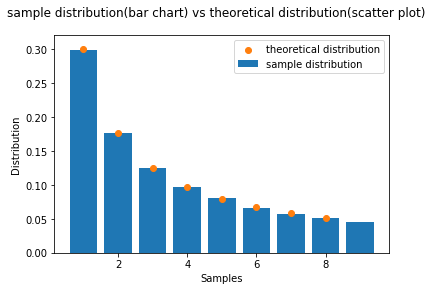

In [35]:
values, counts=np.unique(samples,return_counts=True)
plt.bar(values,counts/np.sum(counts),label="sample distribution")
outcomes=np.arange(1,9)
pmf=np.log10(1+1/outcomes)
plt.scatter(outcomes,pmf,zorder=2,label="theoretical distribution")
plt.legend(loc="best")
plt.suptitle('sample distribution(bar chart) vs theoretical distribution(scatter plot)')
plt.xlabel("Samples")
plt.ylabel("Distribution")
plt.show()